In [1]:
import pandas as pd
# get data
df = pd.read_csv('USA_Housing.csv').dropna()

df.drop(['Address'], axis=1, inplace=True)

y = df.iloc[:, -1].values
x = df.iloc[:, :-1].values
print(y.shape, x.shape)

(5000,) (5000, 5)


In [2]:
# 80% as train and 20% as test
x_train, x_test = x[ :int(len(x)*0.8)], x[int(len(x)*0.8): ]
y_train, y_test = y[ :int(len(x)*0.8)], y[int(len(x)*0.8): ]

print(x_train[0])
print(y_train[0])

[7.95454586e+04 5.68286132e+00 7.00918814e+00 4.09000000e+00
 2.30868005e+04]
1059033.5578701235


In [3]:
from project1 import ElasticNetModel as ENM

model = ENM(100, 0.5, max_iterate = 1000, rate = 1e-10, tol = 1e-10)

model.fit(x_train, y_train)

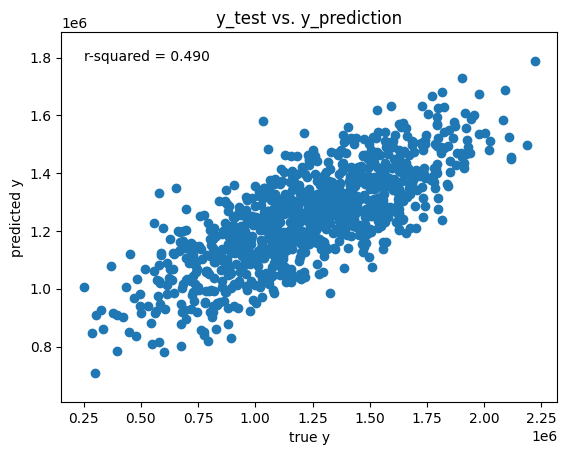

In [4]:
# test model performance
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 
import numpy as np

pred = model.predict(x_test)

r2 = r2_score(y_test, pred)

plt.title('y_test vs. y_prediction')
plt.xlabel('true y')
plt.ylabel('predicted y')
plt.annotate("r-squared = {:.3f}".format(r2), (min(y_test), max(pred)))

plt.xlim(min(y_test)-1e5, max(y_test)+1e5)
plt.ylim(min(pred)-1e5, max(pred)+1e5)
plt.scatter(y_test, pred)

plt.show()